In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV #GridSearch is for hyperparameter tuning
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import plot_tree

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/Fraud_Detection_Dataset.csv')

df

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No
...,...,...,...,...,...,...,...,...,...,...
9995,9996,1524,1475.988992,2023-01-07 22:35:00,Clothing,Los Angeles,95.068658,414.231539,desktop,Yes
9996,9997,4879,764.834233,2023-01-07 22:36:00,Clothing,Los Angeles,902.506946,1090.687430,mobile,No
9997,9998,2624,882.096776,2023-01-07 22:37:00,Travel,New York,531.237353,186.667431,mobile,No
9998,9999,4907,1.000000,2023-01-07 22:38:00,Dining,Chicago,0.000000,116.343224,desktop,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  int64  
 1   Customer ID                  10000 non-null  int64  
 2   Transaction Amount           10000 non-null  float64
 3   Transaction Date and Time    10000 non-null  object 
 4   Merchant Category            10000 non-null  object 
 5   Location                     10000 non-null  object 
 6   Previous Transaction Amount  10000 non-null  float64
 7   Time Since Last Transaction  10000 non-null  float64
 8   Device Type                  10000 non-null  object 
 9   Fraud                        10000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 781.4+ KB


In [5]:
df.describe()

,Transaction ID,Customer ID,Transaction Amount,Previous Transaction Amount,Time Since Last Transaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,3010.561100,559.865608,461.410984,677.040726
std,2886.89568,1152.371939,399.984400,334.582413,432.386769
min,1.00000,1000.000000,1.000000,0.000000,1.000000
25%,2500.75000,2001.750000,262.969956,181.109688,295.523894
50%,5000.50000,3004.000000,522.370941,404.367010,653.143168
75%,7500.25000,4010.000000,788.415931,676.079655,1048.479972
max,10000.00000,4999.000000,2953.394492,1500.000000,1694.715674


In [6]:
# Convert data type for Transaction Date and Time 

df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'], errors = 'coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction ID               10000 non-null  int64         
 1   Customer ID                  10000 non-null  int64         
 2   Transaction Amount           10000 non-null  float64       
 3   Transaction Date and Time    10000 non-null  datetime64[ns]
 4   Merchant Category            10000 non-null  object        
 5   Location                     10000 non-null  object        
 6   Previous Transaction Amount  10000 non-null  float64       
 7   Time Since Last Transaction  10000 non-null  float64       
 8   Device Type                  10000 non-null  object        
 9   Fraud                        10000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 781.4+ KB


In [7]:
df.groupby('Fraud')['Transaction ID'].count()

# imbalanced dataset:
# Majority of the transactions are not fraud

Fraud
No     8608
Yes    1392
Name: Transaction ID, dtype: int64

In [8]:
df.groupby('Customer ID')['Fraud'].count()

Customer ID
1000    1
1001    5
1002    2
1003    1
1004    1
       ..
4995    1
4996    5
4997    1
4998    2
4999    2
Name: Fraud, Length: 3664, dtype: int64

In [9]:
# Extract hours from the transaction date and time - the hour when the transaction happens 

df['hour'] = df['Transaction Date and Time'].apply(lambda x: x.hour)

df

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud,hour
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No,0
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No,0
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No,0
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No,0
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1524,1475.988992,2023-01-07 22:35:00,Clothing,Los Angeles,95.068658,414.231539,desktop,Yes,22
9996,9997,4879,764.834233,2023-01-07 22:36:00,Clothing,Los Angeles,902.506946,1090.687430,mobile,No,22
9997,9998,2624,882.096776,2023-01-07 22:37:00,Travel,New York,531.237353,186.667431,mobile,No,22
9998,9999,4907,1.000000,2023-01-07 22:38:00,Dining,Chicago,0.000000,116.343224,desktop,No,22


<AxesSubplot:xlabel='Fraud', ylabel='Time Since Last Transaction'>

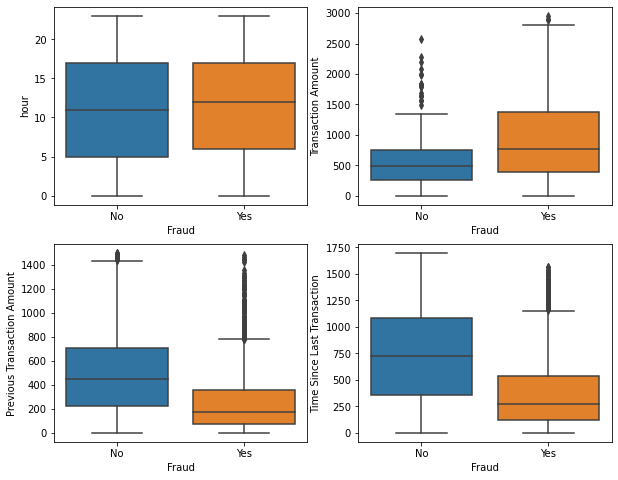

In [10]:
# data exploration 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))   

sns.boxplot(x='Fraud', y='hour', data=df, ax=ax1) 

sns.boxplot(x='Fraud', y='Transaction Amount', data=df, ax=ax2)

sns.boxplot(x='Fraud', y='Previous Transaction Amount', data=df, ax=ax3)

sns.boxplot(x='Fraud', y='Time Since Last Transaction', data=df, ax=ax4)



From the above boxplots, it is able to see there isn't much difference between the time when a fraud transaction happened, comparing to the non-fraud ones.

The transaction amount of fraud transaction seem to be higher than the non-fraud transactions;

The previous transaction amount of fraud transaction is much lower than non-fraud, which is reasonable because a fraud transaction is normally identified with an abnormal high purchasing amount; 

The time since last transaction for fraud transaction is lower than non-fraud, which indicating the fraud transaction is made consecutively, especially when encountering for multiple fraud purchases under one customer's account. 

These are features that could have relationships with fraud. 



In [11]:
# Create another output column - make the column into binary with numeric numbers 
# 0 - No, 1 - Yes

mapping = {'No':0, 'Yes':1}

df['binary_fraud'] = df['Fraud'].map(mapping)

df

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud,hour,binary_fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No,0,0
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No,0,0
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No,0,0
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No,0,0
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1524,1475.988992,2023-01-07 22:35:00,Clothing,Los Angeles,95.068658,414.231539,desktop,Yes,22,1
9996,9997,4879,764.834233,2023-01-07 22:36:00,Clothing,Los Angeles,902.506946,1090.687430,mobile,No,22,0
9997,9998,2624,882.096776,2023-01-07 22:37:00,Travel,New York,531.237353,186.667431,mobile,No,22,0
9998,9999,4907,1.000000,2023-01-07 22:38:00,Dining,Chicago,0.000000,116.343224,desktop,No,22,0


<AxesSubplot:xlabel='binary_fraud'>

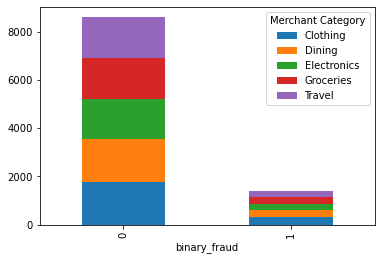

In [12]:
df.groupby(['binary_fraud', 'Merchant Category'])['Transaction ID'].count().unstack().plot(kind = 'bar', stacked = True)

# Equal distribution in Merchant Category

<AxesSubplot:xlabel='binary_fraud'>

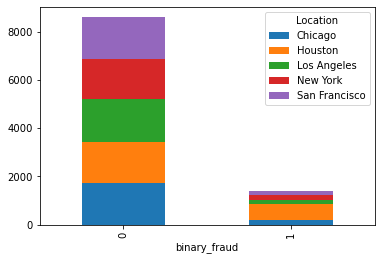

In [13]:
df.groupby(['binary_fraud', 'Location'])['Transaction ID'].count().unstack().plot(kind = 'bar', stacked = True)

# See many fraud happening in Houston 

<AxesSubplot:xlabel='binary_fraud'>

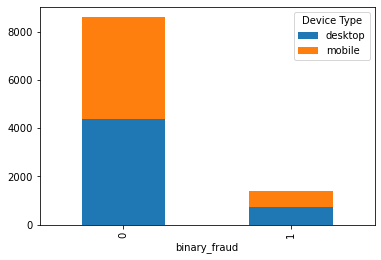

In [14]:
df.groupby(['binary_fraud', 'Device Type'])['Transaction ID'].count().unstack().plot(kind = 'bar', stacked = True)

# See equal distribution in device type 

#### Hypothesis of this problem is: 

Null hypothesis: The features of Location, Transaction Amount, Previous Transaction Amount and Time Since Last Transaction do not have significant impact on the model of predicting fraud. 

Alternative hypothesis: The features of Location, Transaction Amount, Previous Transaction Amount and Time Since Last Transaction do have significant impact on the model of predicting fraud. 

In [15]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant Category', 'Location',
       'Previous Transaction Amount', 'Time Since Last Transaction',
       'Device Type', 'Fraud', 'hour', 'binary_fraud'],
      dtype='object')

In [16]:
cat_column = ['Location', 'Merchant Category', 'Device Type']

num_column = ['Transaction Amount', 'Previous Transaction Amount', 'Time Since Last Transaction',
              'hour']

In [17]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant Category', 'Location',
       'Previous Transaction Amount', 'Time Since Last Transaction',
       'Device Type', 'Fraud', 'hour', 'binary_fraud'],
      dtype='object')

In [18]:
X = df[['Transaction Amount', 'Merchant Category', 'Location',
       'Previous Transaction Amount', 'Time Since Last Transaction',
       'Device Type', 'hour']] 

y = df['binary_fraud']

In [19]:
# Scale the numerical variables 

MinMaxScaler().fit_transform(df[num_column])

array([[0.22297057, 0.3862158 , 0.28362347, 0.        ],
       [0.16022468, 0.27148018, 0.68382852, 0.        ],
       [0.16861553, 0.17705574, 0.42491033, 0.        ],
       ...,
       [0.29843464, 0.35415824, 0.10962137, 0.95652174],
       [0.        , 0.        , 0.0681007 , 0.95652174],
       [0.05349904, 0.10114595, 0.10756374, 0.95652174]])

In [20]:
# Encode x variables - categorical ones 

X_encoded = pd.get_dummies(X, columns=cat_column, dtype=int)

In [21]:
X_encoded

,Transaction Amount,Previous Transaction Amount,Time Since Last Transaction,hour,Location_Chicago,Location_Houston,Location_Los Angeles,Location_New York,Location_San Francisco,Merchant Category_Clothing,Merchant Category_Dining,Merchant Category_Electronics,Merchant Category_Groceries,Merchant Category_Travel,Device Type_desktop,Device Type_mobile
0,659.297095,579.323704,481.377516,0,0,0,1,0,0,1,0,0,0,0,1,0
1,474.046452,407.220271,1159.211075,0,0,1,0,0,0,0,1,0,0,0,1,0
2,498.819570,265.583605,720.677284,0,0,0,0,0,1,0,1,0,0,0,1,0
3,744.199592,1097.259081,1.000000,0,0,0,1,0,0,0,0,1,0,0,0,1
4,279.181247,238.389682,1378.958721,0,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1475.988992,95.068658,414.231539,22,0,0,1,0,0,1,0,0,0,0,1,0
9996,764.834233,902.506946,1090.687430,22,0,0,1,0,0,1,0,0,0,0,0,1
9997,882.096776,531.237353,186.667431,22,0,0,0,1,0,0,0,0,0,1,0,1
9998,1.000000,0.000000,116.343224,22,1,0,0,0,0,0,1,0,0,0,1,0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

In [23]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_column),
        ('cat', pd.get_dummies(X, columns=cat_column, dtype=int), cat_column)
    ]
)

[Text(0.6616192690630238, 0.984375, 'Transaction Amount <= 1085.384\ngini = 0.242\nsamples = 8000\nvalue = [6872, 1128]\nclass = 0'),
 Text(0.365075353469726, 0.953125, 'Previous Transaction Amount <= 115.745\ngini = 0.177\nsamples = 7589\nvalue = [6843, 746]\nclass = 0'),
 Text(0.1648460758226414, 0.921875, 'Transaction Amount <= 280.006\ngini = 0.407\nsamples = 1225\nvalue = [877, 348]\nclass = 0'),
 Text(0.10480609637221065, 0.890625, 'Time Since Last Transaction <= 271.262\ngini = 0.24\nsamples = 1003\nvalue = [863, 140]\nclass = 0'),
 Text(0.045314434755117636, 0.859375, 'Transaction Amount <= 144.506\ngini = 0.436\nsamples = 224\nvalue = [152, 72]\nclass = 0'),
 Text(0.026556366414627077, 0.828125, 'Previous Transaction Amount <= 7.523\ngini = 0.308\nsamples = 163\nvalue = [132, 31]\nclass = 0'),
 Text(0.009273651763838027, 0.796875, 'Transaction Amount <= 43.829\ngini = 0.499\nsamples = 27\nvalue = [14, 13]\nclass = 0'),
 Text(0.00337223700503201, 0.765625, 'hour <= 16.5\ngini =

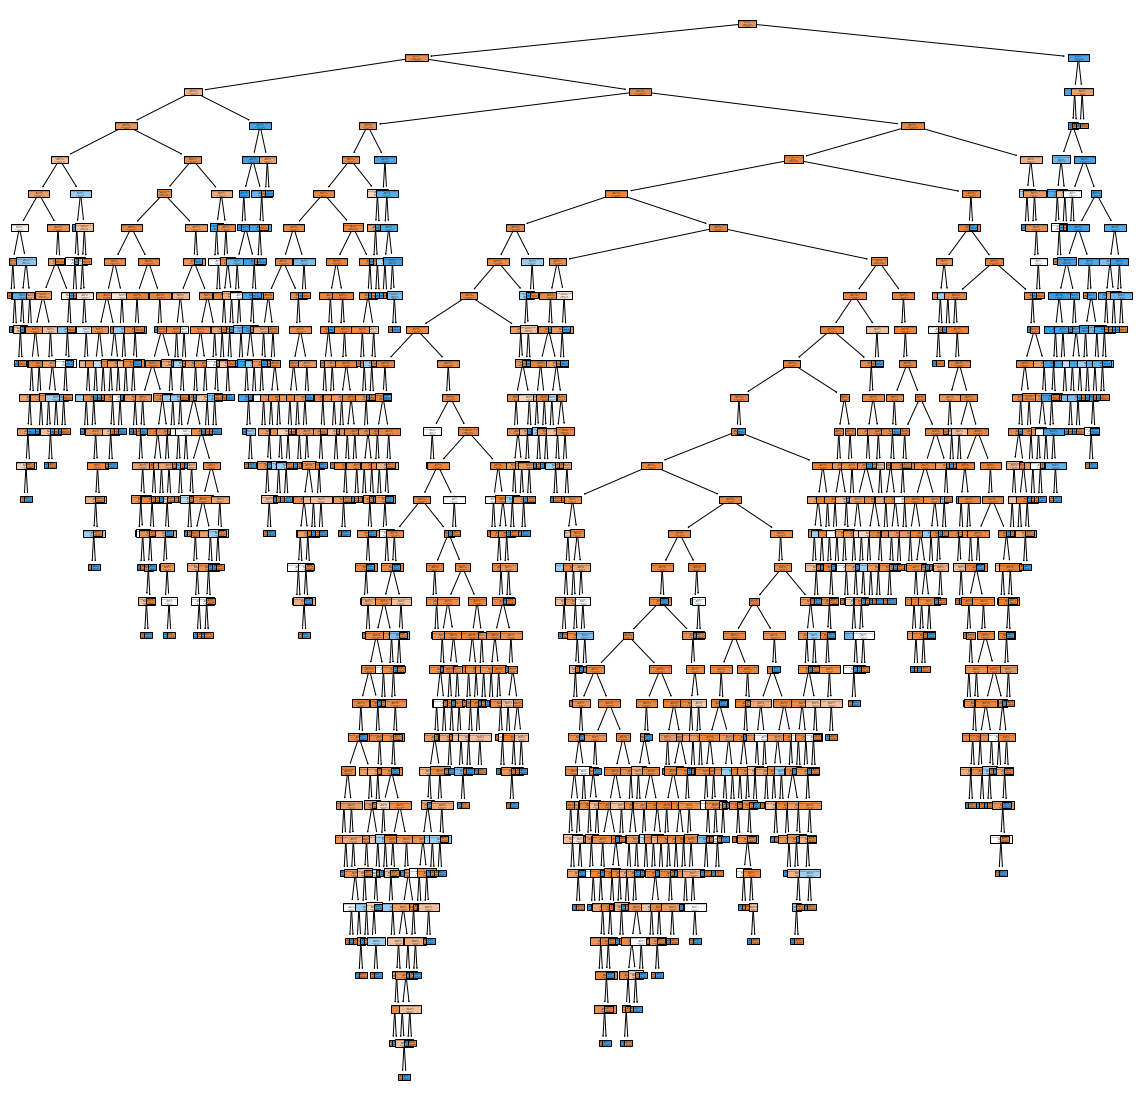

In [24]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, class_names=['0','1'], feature_names=X_encoded.columns)


In [25]:
# check for overfitting

pred_train1 = dt.predict(X_train)
# make predictions on the training data 

pred_test1 = dt.predict(X_test)
# make predictions on the testing data 

print(f1_score(pred_train1, y_train))

print(f1_score(pred_test1, y_test))

# f1 score of training data is very high -- training score is much higher than the testing score -- overfitting 
# training prediction is 100% accurate, and the actual testing is significantly lower -- therefore - overfit the model 

1.0
0.5790408525754883


Text(0.5, 15.0, 'Predicted Classes')

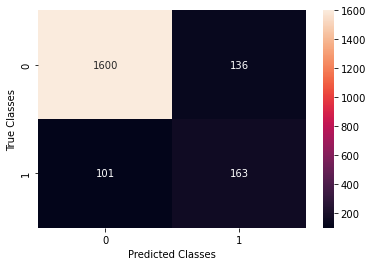

In [26]:
# Confusion Matrix for Random Forest Model 

conf_matrix_ranfor = confusion_matrix(y_test, pred_test1)

sns.heatmap(conf_matrix_ranfor, fmt='g', annot = True)
plt.ylabel('True Classes')
plt.xlabel('Predicted Classes')


The model is good at predicting the (0,0) True negative -- the negative class, which is the class identified as Non-fraud, this may be due to the imbalanced dataset -- in which fraud transactions are little and non-fraud takes the majority. 

In [27]:
# optimizing for overfitting 
# max_depth 
# min_samples_split
# min_samples_leaf 

params = {'max_depth':[2,4,6,8,10],

          'min_samples_split':[8,10,14,18,24],

          'min_samples_leaf':[4,8,12,16,20]}

In [28]:
random_search = RandomizedSearchCV(dt, params, cv = 5, verbose = 1, scoring = 'accuracy')

In [29]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'min_samples_leaf': [4, 8, 12, 16, 20],
                                        'min_samples_split': [8, 10, 14, 18,
                                                              24]},
                   scoring='accuracy', verbose=1)

In [30]:
print(random_search.best_params_)

{'min_samples_split': 8, 'min_samples_leaf': 20, 'max_depth': 8}


0.738942826321467
0.7213114754098361


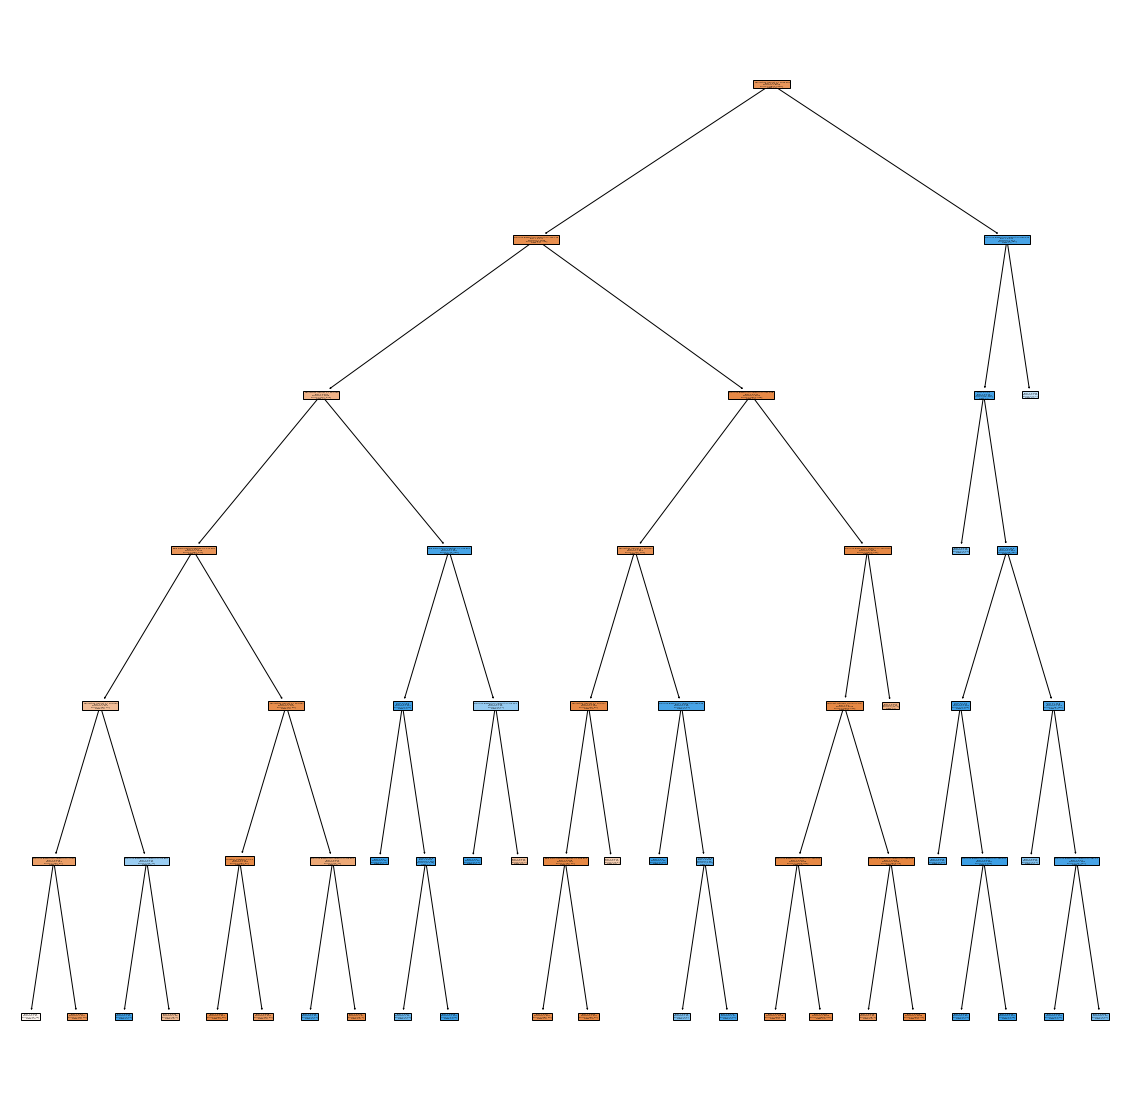

In [31]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=12, min_samples_split=10)    

dt = dt.fit(X_train, y_train)

plt.figure(figsize=(20,20))

plot_tree(dt, filled=True, class_names=['0','1'], feature_names=X_encoded.columns);

pred_train1 = dt.predict(X_train)

pred_test1 = dt.predict(X_test)

print(f1_score(pred_train1, y_train))

print(f1_score(pred_test1, y_test))

# performance here is much better - between train and test 
# we want the model to perform well on not only the training data, but also the testing data 
# here, the f1 scores for both training data and testing data are lower than the one pre-tuning, and also 
# the scores are close to each other, which is good. 

In [32]:
print(precision_score(pred_train1, y_train))

print(precision_score(pred_test1, y_test))

0.6072695035460993
0.5833333333333334


In [33]:
print(recall_score(pred_train1, y_train))

print(recall_score(pred_test1, y_test))

0.9435261707988981
0.9447852760736196


In [34]:
# test 2 other models with cross validation to see which ones work best for this dataset

logreg = LogisticRegression()
ranfor = RandomForestClassifier() 

In [35]:
ranfor_scores = cross_val_score(ranfor, X_train, y_train, scoring='f1', cv=5)
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='f1', cv=5)

In [36]:
print(np.mean(ranfor_scores))
print(np.mean(logreg_scores))

0.722587450475063
0.6470401963666905


In [37]:
ranfor_scores = cross_val_score(ranfor, X_train, y_train, scoring='precision', cv=5)
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='precision', cv=5)

In [38]:
print(np.mean(ranfor_scores))
print(np.mean(logreg_scores))

0.9248535373868428
0.9461834618181012


In [39]:
ranfor_scores = cross_val_score(ranfor, X_train, y_train, scoring='recall', cv=5)
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='recall', cv=5)

In [40]:
print(np.mean(ranfor_scores))
print(np.mean(logreg_scores))

0.5904346116027532
0.4928692232055064
